# Introduction to Scikit-learn (sklearn)

This notebook demonstrates some of the most useful functions of the beautiful skit learn Library.

What are we going to cover :

0. An end to end scikit learn workflow
1. Getting into data ready
2. choose the right estimator/model/algo for problems
3. Fit the model/algorithm and use it to make predictions on our data
4. Evaluating a model
5. Improve a model
6. save and load a trained model
7. Putting it all together




In [1]:
What_we_are_covering =[
"0. An end to end scikit learn workflow",
"1. Getting into data ready",
"2. choose the right estimator/model/algo for problems",
"3. Fit the model/algorithm and use it to make predictions on our data",
"4. Evaluating a model",
"5. Improve a model",
"6. save and load a trained model",
"7. Putting it all together"] 

What_we_are_covering

['0. An end to end scikit learn workflow',
 '1. Getting into data ready',
 '2. choose the right estimator/model/algo for problems',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. save and load a trained model',
 '7. Putting it all together']

In [2]:
#Standards imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

## 0.An end to end scikit-learn workflow

## 1.Get the data ready

In [3]:
import numpy as np

In [4]:
#1.Get the data ready
import pandas as pd

heart_disease=pd.read_csv("heart-disease.csv")
heart_disease.head(10)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [5]:
#Create X (feature matrix or feature (f) jo tha or data or variable)

#It will be all the column which will be used to predict the output i.e class label.

#Here we have target as class label and all other columns as features.

x=heart_disease.drop("target",axis=1)

#create y( class labels or labels) 
y=heart_disease["target"]

## 2.Choose the right model and hyperparameters

In [6]:
# 2.Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier

#or model
clf=RandomForestClassifier()

#We will keep the default hyperparameters
clf.get_params()


{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## 3. Splitting the data , Fit the model to the data and predict

In [7]:
#3.Fit the model to the data
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

#80% data in training and 20% data is used for testing 

In [8]:
clf.fit(X_train,y_train);

C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [9]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
221,55,1,0,140,217,0,1,111,1,5.6,0,0,3
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1
123,54,0,2,108,267,0,0,167,0,0.0,2,0,2
180,55,1,0,132,353,0,1,132,1,1.2,1,1,3
130,54,0,2,160,201,0,1,163,0,0.0,2,1,2


In [10]:
#make a prediction
y_label=clf.predict(np.array([0,2,3,4]))

ValueError: Expected 2D array, got 1D array instead:
array=[0. 2. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
#Since numpy array does not look like this but what does look like this is X_test

y_preds_on_X_test=clf.predict(X_test)
y_preds_on_X_test

In [ ]:
y_test

## 4.Evaluate the model on the training data and test data

In [ ]:
clf.score(X_train,y_train)

In [ ]:
clf.score(X_test,y_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

print(classification_report(y_test,y_preds))

In [ ]:
confusion_matrix(y_test,y_preds)

In [ ]:
accuracy_score(y_test,y_preds)

## 5. Improve a model
## Try different amount of n_estimators


In [ ]:
np.random.seed(42)
for i in range(10,100,10):
    print(f"Trying model with {i} estimators")
    clf=RandomForestClassifier(n_estimators=i).fit(X_train,y_train)
    print(f"Model accurary on test set : {clf.score(X_test,y_test) * 100}%.2f")
    print("")

In [ ]:
X_train.shape,y_train.shape

## 6.save the model and load it

In [ ]:
##6.save the model and load it
import pickle

pickle.dump(clf,open("random_forest_model_1.pkl","wb"))#wb=write_binary

In [ ]:
loaded_model = pickle.load(open("random_forest_model_1.pkl","rb"))
loaded_model.score(X_test,y_test)

In [ ]:
## Optional for debugging warnings
import warnings
#warnings.fiter("ignore")
import sklearn
import matplotlib
#uper me dalna 
sklearn.__version__
matplotlib.__version__

#now if something does not work for that version how to update the version..



In [ ]:
What_we_are_covering

## Getting the data ready to be used with machine learning :

Three main things we have to do :

    1.Split the data into features and labels(Usually 'X' and 'y')
    2. Filling (also called imputing) or disregarding missing           values
    3. Convert non-numerical values into numerical values(also called feature encoding)
        

In [ ]:
heart_disease.head()

In [ ]:
X=heart_disease.drop("target",axis=1)
X.head()

In [ ]:
y=heart_disease["target"]

In [ ]:
y.head()

In [ ]:
#Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,
                                               y,
                                               test_size=0.3)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

In [ ]:
212+91

clean data -- > Transform Data --> Reduce Data

#### 1.1 MAKE SURE ITS ALL NUMERICAL

In [ ]:
car_sales_extended=pd.read_csv("data/car-sales-extended.csv")
car_sales_extended

In [ ]:
car_sales_extended.head()

In [ ]:
car_sales_extended.shape,type(car_sales_extended)

In [ ]:
#Split thre data into X/y

X=car_sales_extended.drop("Price",axis=1)
y=car_sales_extended["Price"]

from sklearn.model_selection import train_test_split
#Splitting into training and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)


In [ ]:
#Build machine learning model
from sklearn.ensemble import RandomForestRegressor

model=RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

## Since Blue is a string and ml model take only numerical value so we will convert


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features=["Make","Colour","Doors"]#Select the feature which you want to convert into numerical value

#Why Doors because it is also of category of type 3,4,5

one_hot=OneHotEncoder()#instantiate the one hot encoder

transformer=ColumnTransformer([("one_hot",one_hot,categorical_features)],remainder="passthrough") #here we say hey column_transofrmer 
#take one_hot as parameter and convert catagorical_features into numerical value and remainder will passed through leave as it is. 

transformed_X=transformer.fit_transform(X)#then we fit_transform on the DATA FRAME WE want to work

transformed_X

In [ ]:
pd.DataFrame(transformed_X)

In [ ]:
X.head()

In [ ]:
#Another way
dummies=pd.get_dummies(car_sales_extended[["Make","Colour","Doors"]])
dummies

In [ ]:
#Door is already a numerical value hence not converted,now our data is in 0 and 1

In [ ]:
#lets refit the model
np.random.seed(42)
X_train,X_test,y_train,y_test=train_test_split(transformed_X,y,test_size=0.2)
model.fit(X_train,y_train)

In [ ]:
model.score(X_test,y_test)

### 1.2 what if there were missing values

Solutions :

    1.Fill them with some values(also known as imputation).
    2.Remove the samples with missing data together.

In [ ]:
#Import car_sales missing data 
car_sales_missing=pd.read_csv("Data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

In [ ]:
car_sales_missing.shape

In [ ]:
#to check missing value if any
car_sales_missing.isna().sum()

In [ ]:
#Let's try and convert our data to numbers
#Create X and y

X=car_sales_missing.drop("Price",axis=1)
y=car_sales_missing["Price"]


In [ ]:
#now we convert this data into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

catergorical_features=["Make","Colour","Doors"]
one_hot=OneHotEncoder()

transformer=ColumnTransformer([("one_hot",one_hot,categorical_features)],remainder="passthrough")

transformed_X=transformer.fit_transform(X)
transformed_X



In [ ]:
car_sales_missing

### Option1 : Fill missing data with Pandas

In [ ]:
car_sales_missing["Doors"].value_counts()

In [ ]:
#Fill the "Make" column

car_sales_missing["Make"].fillna("missing",inplace=True)

#Fill the "Colour" column
car_sales_missing["Colour"].fillna("missing",inplace=True)

#Fill the "Odometer (KM) column"
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(),inplace=True)

#Fill the "Doors" Column
car_sales_missing["Doors"].fillna(4,inplace=True)



In [ ]:
car_sales_missing.isna().sum()

In [ ]:
#Remove rows with missing values for class label Price We have not filled it because it is what we want to predict
#It is hard to predict which do not have a output value

In [ ]:
car_sales_missing.dropna(inplace=True)

In [ ]:
car_sales_missing.isna().sum()

In [ ]:
len(car_sales_missing)

In [ ]:
X=car_sales_missing.drop("Price",axis=1)
y=car_sales_missing["Price"]

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

one_hot=OneHotEncoder()
categorical_feature=["Make","Colour","Doors"]
transformer=ColumnTransformer([("one_hot",one_hot,categorical_feature)],remainder="passthrough")
transformed_X=transformer.fit_transform(car_sales_missing)
transformed_X


In [ ]:
#IF we want to fill the data by scikit instead with panda 

### Option 2 :Fill missing values in a data set with pure scikit learn
## NOTE : Fill the training and testing data seperately here we have done it but it is not recommeneded
## Training data should be seperated from test data 

# Option 2: Handling missing values with scikit learn

In [ ]:
car_sales_missing=pd.read_csv("Data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

In [ ]:
car_sales_missing.isna().sum()

In [ ]:
X=car_sales_missing.drop("Price",axis=1)
y=car_sales_missing["Price"]

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
X_train.isna().sum()

In [ ]:
X_test.isna().sum()

In [ ]:
y_train.isna().sum()

In [ ]:
y_test.isna().sum()

In [ ]:
len(y_train)

In [ ]:
y_train.dropna(inplace=True)

In [ ]:
len(y_train)

In [ ]:
800-36

In [ ]:
len(y_test)

In [ ]:
y_test.dropna(inplace=True)

In [ ]:
len(y_test)

In [ ]:
200-14

In [ ]:
#Now filling the missing values with scikit learn instead of pandas
from sklearn.impute import SimpleImputer # simple imputer fn basically strategy lega aur value kya fill krna h wo lega (strategy = constant to value dena prega , strategy!=constant to value not required)
from sklearn.compose import ColumnTransformer # Coulmntransformer basically comun ko imputer fn ke madad se transform kr dega previosuly onehotencoder se transform kiye the yha imputer se krenge 

#Fill Categorical values with 'missning' & numerical values with mean
cat_imputer=SimpleImputer(strategy="constant",fill_value="missing") # constant h to value dena prega
door_imputer=SimpleImputer(strategy="constant",fill_value=4)#same
num_imputer=SimpleImputer(strategy="mean")#no value

#Define coulums which needed to be filled by the imputer
cat_feature=["Make","Colour"]#ye column me changes chahiye
door_feature=["Doors"]#isme alag se isliye kiye kyu 4 bharenge na ki missing
num_feature=["Odometer (KM)"]

#Create an imputer (something that fills missing data)

imputer = ColumnTransformer([# ColumnTransformer 3 types ka data lega 1st is the name of the change that we want to do, uska object reference, tisra kispe change krna h
    ("cat_imputer",cat_imputer,cat_feature),
    ("door_imputer",door_imputer,door_feature),
    ("num_imputer",num_imputer,num_feature)
])

#Transform the data
filtered_X_train=imputer.fit_transform(X_train)
filtered_X_test=imputer.fit_transform(X_test)

In [ ]:
filtered_X_train

In [ ]:
X_train_filled=pd.DataFrame(filtered_X_train,columns=X_train.keys())
X_train_filled.head()

In [ ]:
X_train_filled.isna().sum()

In [ ]:
X_test_filled=pd.DataFrame(filtered_X_test,columns=X_test.keys())
X_test_filled.columns

In [ ]:
X_test_filled.isna().sum()

In [ ]:
X_train_removed=X_train_filled.drop(X_train_filled.tail(36).index)
X_test_removed=X_test_filled.drop(X_test_filled.tail(14).index)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

one_hot=OneHotEncoder()
categorical_feature=["Make","Colour","Doors"]
transformer=ColumnTransformer([("one_hot",one_hot,categorical_feature)])
transformed_X_train=transformer.fit_transform(X_train_removed)
transformed_X_test=transformer.fit_transform(X_test_removed)



In [ ]:
transformed_X_train

In [ ]:
transformed_X_test

In [ ]:
model=RandomForestRegressor()

model.fit(transformed_X_train,y_train)

model.score(transformed_X_test,y_test)

In [ ]:
X_train_removed=X_train_filled.drop(X_train_filled.tail(6).index)

In [ ]:
X_train_filled.tail(6).index

In [ ]:
200-186

In [ ]:
transformed_X_train[0].shape

# We will come to it later right now i have to learn. This part is remaining ^

In [ ]:
What_we_are_covering

# 2.Choose the right estimator/algorithm/model for our problem

### Scikit-Learn uses estimator as another term for machine learning model or algorithm.

# Depends What kind of problem we are dealing with :

* Classification - predicting whether a sample is one thing or another.
* Regression      - Predicting a number

Scikit has one resource for this
Google : sklearn machine learning map.
    
https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html
    
Step 1.Check the map , check if improvement can be done   

### 2.1 Picking a machine leanring model for regression problem

In [ ]:
# Import Boston housing dataset

from sklearn.datasets import load_boston
boston=load_boston()
boston.keys()

In [ ]:
boston_df=pd.DataFrame(data=boston['data'],columns=boston['feature_names'])
boston_df["target"]=pd.Series(boston["target"])
boston_df.head()

In [ ]:
#How many samples ?

len(boston_df)

In [ ]:
# from scikit learn lets try ridge regression model

from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

np.random.seed(42)

#Create the data
X=boston_df.drop("target",axis=1)
y=boston_df["target"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

#Instantiate the model
model=Ridge()
model.fit(X_train,y_train)

model.score(X_test,y_test)#highest = 1, lowest = 0


### How do we imporve the score ?

### What if ridge is not working ?

##### From the map we came to know that if Ridge regression is not working...
##### then we can use ensemble method --> RandomForestRegressor(aata h RandomForestClassifier aata h) map dekh lena ek bar 

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

#Set Random seed
np.random.seed(32)

#Prepare data
X=boston_df.drop("target",axis=1)
y=boston_df["target"]

#Split the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

#Instantiate RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100)

#Evaluate the Random Forest Regressor

rf.fit(X_train,y_train)
rf.score(X_test,y_test)


In [ ]:
#Check the ridge model again

model.score(X_test,y_test)

### 2.2 Choosing an estimator for classification problem

Lets go to the map : https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [ ]:
heart_disease=pd.read_csv("Data/heart-disease.csv")
heart_disease.head()

In [ ]:
len(heart_disease)

<B>Consulting the map and its says to try LinearSVC:<B>

In [ ]:
#Importing the LinearSVC estimator class
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split 
#Setup random seed
np.random.seed(42)

#prepare the data
X=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

#Split the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

#Instantiate the model LinearSVC
clf=LinearSVC()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)


In [ ]:
heart_disease["target"].value_counts()

In [ ]:
#Importing the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split 
#Setup random seed
np.random.seed(42)

#prepare the data
X=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

#Split the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

#Instantiate the model RandomForestClassifer
clf1=RandomForestClassifier(n_estimators=100)
clf1.fit(X_train,y_train)
clf1.score(X_test,y_test)


In [ ]:
clf.score(X_test,y_test)

# Tidbid :
## Now we have question why we have left the other models and does not go there because : 
### 1. if we have structured data like tables the using ensemble method will give us better outcome.
### 2. if we have unstructured data (images,audio,text) then use deeplearning or transfer learning model 


In [ ]:
What_we_are_covering

# 3.Fit the model/algorithm and use it to make predictions on our data :

#### 3.1 Fitting the model to the data

#### X=features,featues variable,data
#### y=labels,class labels, target,target variables

In [ ]:
#Importing the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split 
#Setup random seed
np.random.seed(42)
heart_disease=pd.read_csv("Data/heart-disease.csv")
#prepare the data
X=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

#Split the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

#Instantiate the model RandomForestClassifer
clf1=RandomForestClassifier(n_estimators=100)


#Fit the model to the data (Training the machine leanring model to find pattern)

clf1.fit(X_train,y_train)

#Evaluate the random forest classifier (Use the patterns the model has learned )
#Xtest ko lega pattern jo find kiya h fit se us patten pe predict krta h , 
#then compare krta h with y class label aur accuracy batata h 0 aur 1 ke bich me 

clf1.score(X_test,y_test)


#### 3.2. Make prediction using the machine learning models (Unseen data)

Two ways to make predictions :
    
* 1.predict()
* 2.predict_proba()

In [ ]:
# Use a trained model to make prediction

In [ ]:
clf.predict(np.array[1,7,8,3,4])#this does not work

In [ ]:
X_test.shape,y_test.shape

In [ ]:
clf1.predict(X_test)

In [ ]:
np.array(y_test)

In [ ]:
#Compare predictions to the truth labels to evaluate the model
y_preds=clf1.predict(X_test)
np.mean(y_preds==y_test)#y_test is also refereed as a ground truth value.

In [ ]:
clf1.score(X_test,y_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_preds)#three different ways to do the same things. predicting mean() values.

## Make predictions with predict_proba()

In [ ]:
#predict_proba() return probabibility of classification label
clf1.predict_proba(X_test[:5])#left bda to 0 right bda to 1 compare both predict and predict_proba()
#Threshold is 0.51

In [ ]:
0.89+0.11,0.49+0.51,0.43+0.57

In [ ]:
clf1.predict(X_test[:5])# 1st 0 because 0.89 on left 

In [ ]:
heart_disease["target"].value_counts()

In [ ]:
#Predict will give us a single label where as predict proba gives probablity hospital me use kr sakte threshold set krne ke liye ki 0.89 ke uper ho tabhi work krenge

In [ ]:
#How to use predict model for Regression problem.

### `predict()` can also be used for regression model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_boston

boston=load_boston()
boston.keys()
boston_df=pd.DataFrame(boston["data"],columns=boston["feature_names"])
boston_df["target"]=boston["target"]
boston_df.head()

In [ ]:
np.random.seed(33)

type(boston_df)
#Import the data
X= boston_df.drop("target",axis=1)
y= boston_df["target"]

#Split the training data and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

#Instantiate and fit model
model=RandomForestRegressor(n_estimators=100)

model.fit(X_train,y_train)
model.score(X_test,y_test)

#Make prediction :
y_preds=model.predict(X_test)


In [ ]:
y_preds[:10]

In [ ]:
np.array(y_test[:10])

In [ ]:
#Compare the prediction to the truth

from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_preds)#it will give on an average how far is value from actual true value on an average

In [ ]:
What_we_are_covering

## 4. Evaluating a Machine learning model

#### We have seen prediction of our model in test data but how will we be sure if the model can be used in production or not.

Three ways to evaluate Scikit-Learn models/estimators
1. Estimator `score` method
2. The `scoring` parameter
3. Problem-specific-metric fucntions

In [ ]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(2)

X=heart_disease.drop("target",axis=1)
y=heart_disease["target"]


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

clf=RandomForestClassifier(n_estimators=100)

clf.fit(X_train, y_train)


### 4.1 Evaluating using a `score` method

In [ ]:
clf.score(X_train,y_train)

In [ ]:
clf.score(X_test,y_test)


In [ ]:
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_boston

boston=load_boston()
boston.keys()
boston_df=pd.DataFrame(boston["data"],columns=boston["feature_names"])
boston_df["target"]=boston["target"]
boston_df.head()

#Import the data

X= boston_df.drop("target",axis=1)
y= boston_df["target"]

#Split the training data and test sets

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

#Instantiate and fit model

model=RandomForestRegressor(n_estimators=100)

model.fit(X_train,y_train)

In [ ]:
model.score(X_test,y_test)

### 4.2 Evaluating a model using the `scoring` parameter

In [ ]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X=heart_disease.drop("target",axis=1)
y=heart_disease["target"]


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

clf=RandomForestClassifier(n_estimators=100)

clf.fit(X_train, y_train);

In [ ]:
clf.score(X_test,y_test)

In [ ]:
cross_val_score(clf,X,y,cv=5)

In [ ]:
cross_val_score(clf,X,y,cv=10)

In [ ]:
np.random.seed(42)

#Single training and test split score
clf_single_score=clf.score(X_test,y_test)

#Take the mean of 5-fold cross-validation score
clf_cross_val_score=np.mean(cross_val_score(clf,X,y,cv=5))#We use the average

#Compare the two 
clf_single_score,clf_cross_val_score

In [ ]:
#we will prefer the cross validation matrix.we sitll have not used SCORING PARAMETER


In [ ]:
# Default scoring parameter of classifier = mean accuracy

clf.score()

In [ ]:
#scoring parameter is by default set to None by default

#When scoring is set to none it willset the dafault evaluation matrics of the clsssifier or regressor
cross_val_score(clf,X,y,cv=5,scoring=None)

### 4.2.1 Classification model evaluation metrics

* 1.Accuracy
* 2.Area under ROC curve
* 3.Confusion matrix
* 4.Classification report

#### Accuracy

In [ ]:
heart_disease.head()

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

clf=RandomForestClassifier(n_estimators=100)

cross_val_score=cross_val_score(clf,X,y,cv=5)
#it gives mean accuracy by default.

In [ ]:
np.mean(cross_val_score)

In [ ]:
print(f"Heat Disease Classifier Cross-Validated Accuracy : {np.mean(cross_val_score)*100:.2f}%")

** Area under the receiver operating characteristic curve(AUC/ROC)**
* <b>Area under curve(AUC)
* ROC curve</b>

ROC curve are a comparison of a model true positive rate(tpr) verses a model false positive rate(fpr)

* <b>True Positive = model predicts 1 when truth is 1
*    False positive = model predicts 1 when truth is  0 </b>
* <b>True Negative= model predicts 0 when truth is 0
*    False Negative= model predicts 0 when truth is 1</b>

In [ ]:
#Create X_test... etc

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
from sklearn.metrics import roc_curve

clf=RandomForestClassifier(n_estimators=100)

clf.fit(X_train,y_train)
#Make prediction with probablities

y_probs=clf.predict_proba(X_test)

y_probs[:10] ,len(y_probs)

In [ ]:
y_probs_positive=y_probs[: ,1]#Taking only the positive probablity
y_probs_positive

In [ ]:
#Calculate fpr,tpr and threshold

fpr,tpr,thresholds= roc_curve(y_test,y_probs_positive)
#Check the false positive rates
fpr

In [ ]:
#Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr,tpr):
    """
    Plots a ROC curve given the false positive rate(fpr)
    and true positive rate (tpr) of a model
    """
    #Plot roc curve
    plt.plot(fpr,tpr,color="orange",label="ROC")
    #Plot line with no predictive power(baseline)
    plt.plot([0,1],[0,1],color="blue",linestyle="--",label="Guessing")
    
    #Customize the plot
    plt.xlabel("False Positive Rate (fpr)")
    plt.ylabel("True Positive Rate (tpr)")
    plt.title("Receiver Operating Characteristics (ROC) Curve")
    plt.legend()
    plt.show()

    
plot_roc_curve(fpr,tpr)    

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_probs_positive)

In [ ]:
#Plot perfect ROC curve and AUC score
fpr,tpr,thresholds=roc_curve(y_test,y_test)
plot_roc_curve(fpr,tpr)

In [ ]:
roc_auc_score(y_test,y_test)

In [ ]:
#Rather than using the curve we can use auc_score

### Confusion Matrix

** Confusion Matrix**

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.

In essence , giving you an idea of where a model is getting confused.

In [ ]:
from sklearn.metrics import confusion_matrix

y_preds=clf.predict(X_test)

confusion_matrix(y_test,y_preds)# Sara metrics basically true value se prediction ko compare kr rha h 

In [ ]:
# visualize confusion matrix with pd.crosstabs()

pd.crosstab(y_test,
            y_preds,
            rownames=["Actual Labels"],
            colnames=[" Predicted Labels"]
           )

In [ ]:
#ROW are actal labels and col are predicted labels### 3 false negative and 5 false positive

In [ ]:
22+3+5+31 

In [ ]:
len(y_preds)

In [ ]:
#import sys
#!conda install --yes --prefix {sys.prefix} seaborn
#to install any library on the go

In [ ]:
# Make a confusion matrix with Seaborn heatmap
import seaborn as sns
#Set the font scale
sns.set(font_scale=1.5)

#Create confusion matrix
conf_mat=confusion_matrix(y_test,y_preds)

#Plot it using seaborn
sns.heatmap(conf_mat)






In [ ]:
def plot_conf_mat(conf_mat):
    """Plot a confusion matrix using seaborne's heatmap()"""
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(conf_mat,
                   annot=True,#Annote the boxes with conf_mat info
                   cbar=False)
    
    #Fix the broken annotations(this happend in matplotlib 3.1.1)
    #bottom,top=ax.get_ylim()
    #ax.set_ylim(bottom+0.5,top=0.5);
    
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")
    
plot_conf_mat(conf_mat)

In [ ]:
#In scikit learn we can also plot confusion matrix

from sklearn.metrics import plot_confuison_matrix

plot_confuison_matrix(clf,X,y)

### Evaluating a report using classification report 

## Classification report

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_preds))

<img src="sklearn-classification-report.png"/>

## Precision : indicates the proportion of positive identifications(model predcited class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.

## Recall    :    indicates the proportion of actual positives which were correctly classified. A model produces no false negative has a precision of 1.0.

## f1-score  : A combination of precision and recall . perfect model acheive 1.0
## support : no of samples in which each metrics is calculated on.
## Accuracy  : The accuracy of the model in decimal form.Perfect accuracy is 1.0
## macro avg : imbalanced set reahega tab dekhenge avg precision,recall and F1 score between classes.
## weighed avg : the weighted average precision,recall,F1 score between clasess.

In [ ]:
#Why should we learn all this evaluation instead of messing our brain ?

# Where precision and recall becomes valuable


In [ ]:
disease_true=np.zeros(10000)# 10000 people with disease testing
disease_true[0]=1#only one positive case

disease_preds=np.zeros(10000)# let model predicts every case as 0 

pd.DataFrame(classification_report(disease_true,disease_preds,output_dict=True))

#Massive class imbalance

#These are few metrics there are lot of metrics as well search model evaluation
https://scikit-learn.org/stable/modules/model_evaluation.html

To Summarize classification metrics :

   * <b>Accuracy</b> is a good measure to start with if all classes are balanced(e.g same amount of samples which are labelled with 0 or 1)
   * <b>Precision</b> and <b>recall</b> become more important when classes are imbalanced.
   * if false positive predictions are worse than false negative prediction, aim for higher precision.
   * if false negative preictions are worse than false positives ,aim for higher recall.
   * F1-score is a combination of precision and recall.

### 4.2.2 Regression model evaluation metrics

Metric evaluation metrics : https://scikit-learn.org/stable/modules/model_evaluation.html

1.R^2 (Pronounced r-squared) or coefficient of determination.
2.Mean absoulte error(MAE)
3.Mean squared error(MSE)

### 4.2.2.1.1.R^2 (Pronounced r-squared) or coefficient of determination.

Compares your models prediction to the mean of the targets.values can range from negative infinity (a very poor model) to 1.

For Example, if all your model does is predict the mean of the targets.it's R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1.


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
np.random.seed(42)

boston=load_boston()

boston_df=pd.DataFrame(boston["data"],columns=boston["feature_names"])
boston_df["target"]=boston["target"]
boston_df.head()

X=boston_df.drop("target",axis=1)
y=boston_df["target"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

model=RandomForestRegressor(n_estimators=100)
model.fit(X_train,y_train);


In [ ]:
model.score(X_test,y_test)

In [ ]:
from sklearn.metrics import r2_score

#Fill an array with y_test_mean
y_test_mean=np.full(len(y_test),y_test.mean())#y_test_mean array me hamlog mean bhar diye y_test ka lenghth bhi y_test ka hi array me

In [ ]:
y_test.mean()

In [ ]:
r2_score(y_test,y_test_mean)
#1st case if y_test value will be equal to mean value at y_preds here prediction value is y_test_mean it should be zero here but it giving different results 
#we will check it later

In [ ]:
r2_score(y_test,y_test)

In [ ]:
#it tell us how well our model is doing nut it does not tell us how far our model is off. 

### 4.2.2.1.2 MeanAbosluteError

MAE is the average of the ablsolute differences between predictions and actual values. It gives you an idea of how wrong your models are.

Asolute means sum of all the differences[column] + and - all and we get no line 2.1222..etc this tells us that on an average how much a actual value is far from + or - 2.1222 in this case.

sum the absolute value and divide by total no.

In [ ]:
#Mean Absolute Error
from sklearn.metrics import mean_absolute_error

y_preds=model.predict(X_test)
mae=mean_absolute_error(y_test,y_preds)
mae

In [ ]:
pd.set_option('display.float_format', '{:.3f}'.format)
df=pd.DataFrame(data={"actual values":y_test,"predicted_values":y_preds})
df["differences"]=df["predicted_values"]-df["actual values"]
df

In [ ]:
np.abs(df["differences"]).sum()/102

### 4.2.2.1.3 Mean Squared error (MSE)

MSC>>MAE because it squared the eror as well.

It square the the difference column every element then add all and dvide by total no of elements.

In [12]:
#Mean squared error
from sklearn.metrics import mean_squared_error

y_preds=model.predict(X_test)
mean_squared_error(y_test,y_preds)

NameError: name 'model' is not defined

In [13]:
squared=np.square(df["differences"]).sum()
squared/len(df)

NameError: name 'df' is not defined

# Which of these regression evaluation metrics should we use 
r^2 is similar to accuracy.it gives us a quick indication of how well oru model might be doing.
closer to 1.0 the better .But it does not tells exactly how wrong or how far our model is from actual value.

MAE gives better indication of how far off each of our model's prediction are on average.

AS for `MAE` OR `MSE` because of the wayMSE is calculated,squaring the differences between predicted values and actual values ,it amplifies larger differences.Lets say we are predicting the value of houses(which we are).


* Pay more attenrion to MAE : When being $10,000$   off is twice as bad as being $5000$ off.
* Pay more attention to MSE : When being $10,000$ off is more than thrice as bad a being $5000$ off.

#### tidbid : minimize mae minimze mse maximize r^2

### Machine Learning Model Evaluation (summary)

Evaluating the results of a machine learning model is as important as building one.

But just like how different problems have different machine learning models, different machine learning models have different evaluation metrics.

Below are some of the most important evaluation metrics you'll want to look into for classification and regression models.

Classification Model Evaluation Metrics/Techniques

Accuracy - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.

Precision - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.

Recall - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.

F1 score - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.

Confusion matrix - Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagonal line).

Cross-validation - Splits your dataset into multiple parts and train and tests your model on each part then evaluates performance as an average.

Classification report - Sklearn has a built-in function called classification_report() which returns some of the main classification metrics such as precision, recall and f1-score.

ROC Curve - Also known as receiver operating characteristic is a plot of true positive rate versus false-positive rate.

Area Under Curve (AUC) Score - The area underneath the ROC curve. A perfect model achieves an AUC score of 1.0.

Which classification metric should you use?

Accuracy is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1).

Precision and recall become more important when classes are imbalanced.

If false-positive predictions are worse than false-negatives, aim for higher precision.

If false-negative predictions are worse than false-positives, aim for higher recall.

F1-score is a combination of precision and recall.

A confusion matrix is always a good way to visualize how a classification model is going.

Regression Model Evaluation Metrics/Techniques

R^2 (pronounced r-squared) or the coefficient of determination - Compares your model's predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of the targets, its R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1.

Mean absolute error (MAE) - The average of the absolute differences between predictions and actual values. It gives you an idea of how wrong your predictions were.

Mean squared error (MSE) - The average squared differences between predictions and actual values. Squaring the errors removes negative errors. It also amplifies outliers (samples which have larger errors).

Which regression metric should you use?

R2 is similar to accuracy. It gives you a quick indication of how well your model might be doing. Generally, the closer your R2 value is to 1.0, the better the model. But it doesn't really tell exactly how wrong your model is in terms of how far off each prediction is.

MAE gives a better indication of how far off each of your model's predictions are on average.

As for MAE or MSE, because of the way MSE is calculated, squaring the differences between predicted values and actual values, it amplifies larger differences. Let's say we're predicting the value of houses (which we are).

Pay more attention to MAE: When being $10,000 off is twice as bad as being $5,000 off.

Pay more attention to MSE: When being $10,000 off is more than twice as bad as being $5,000 off.

For more resources on evaluating a machine learning model, be sure to check out the following resources:

Scikit-Learn documentation for metrics and scoring (quantifying the quality of predictions)

Beyond Accuracy: Precision and Recall by Will Koehrsen

Stack Overflow answer describing MSE (mean squared error) and RSME (root mean squared error)
 

## NOW $SCORING PARAMETER$ FINALLY ## 

# 4.2.3 Finally using the `scoring` parameter

In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
heart_disease=pd.read_csv("Data/heart-disease.csv")
X=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

clf=RandomForestClassifier(n_estimators=100)


In [15]:
np.random.seed(42)

cv_acc=cross_val_score(clf,X,y,cv=5,scoring=None)

cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [16]:
#Cross-validate accuracy
print(f"The cross-validated accuracy is {np.mean(cv_acc)*100:.2f}%")


The cross-validated accuracy is 82.48%


In [17]:
np.random.seed(42)
cv_acc=cross_val_score(clf,X,y,cv=5,scoring="accuracy")
print(f"The cross-validated accuracy is {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is 82.48%


In [18]:
np.random.seed(42)
cv_precision=cross_val_score(clf,X,y,cv=5,scoring="precision")
np.mean(cv_precision)

0.8329547346025924

In [19]:
np.random.seed(42)
cv_recall=cross_val_score(clf,X,y,cv=5,scoring="recall")
np.mean(cv_recall)

0.8545454545454545

In [20]:
np.random.seed(42)
cv_f1=cross_val_score(clf,X,y,cv=5,scoring="f1")
np.mean(cv_f1)

0.8426854603423346

#### How about our regression model?

In [21]:
np.random.seed(42)

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_boston

boston=load_boston()
boston.keys()

#boston_df=pd.DataFrame(boston["data"],boston["feature_names"])
boston_df["target"]=boston["target"]

model=RandomForestRegressor(n_estimators=100)




NameError: name 'boston_df' is not defined

In [ ]:
np.random.seed(42)

cv_r2=cross_val_score(model,X,y,cv=5,scoring=None)
cv_r2

In [ ]:
np.random.seed(42)

cv_r2=cross_val_score(model,X,y,cv=5,scoring="r2")
cv_r2

In [22]:
np.random.seed(42)

cv_MAE=cross_val_score(model,X,y,cv=5,scoring="neg_mean_absolute_error")#higher the value  better neg because all value is negative
cv_MAE

NameError: name 'model' is not defined

In [23]:
np.random.seed(42)

cv_MSE=cross_val_score(model,X,y,cv=5,scoring="neg_mean_squared_error")
np.mean(cv_MSE)

NameError: name 'model' is not defined

## 3. METRIC FUNCTIONS

### 4.3 Using different evaluation metrics as Sciki-learn functions

##### Another way to do all the things that we did before

**Classification evaluation functions**

In [24]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
np.random.seed(42)

X=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

clf=RandomForestClassifier()

clf.fit(X_train,y_train)

# Make some predictions

y_preds=clf.predict(X_test)

#Evaluate the classifier

print("Classifier metrics on the test set")
print(f"Accuracy : {accuracy_score(y_test,y_preds)*100:.2f}%")
print(f"Precision : {precision_score(y_test,y_preds)*100:.2f}")
print(f"Recall : {recall_score(y_test,y_preds)*100:.2f}")
print(f"F1 Score : {f1_score(y_test,y_preds)*100:.2f}")



Classifier metrics on the test set
Accuracy : 85.25%
Precision : 89.66
Recall : 81.25
F1 Score : 85.25


C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


** Regression evaluation functions **

In [25]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

X=boston_df.drop("target",axis=1)
y=boston_df["target"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

model=RandomForestRegressor(n_estimators=100)

model.fit(X_train,y_train)

y_preds=model.predict(X_test)

print("Regression model on the test set")
print(f"R^2 :{r2_score(y_test,y_preds)}")
print(f"MAE :{mean_absolute_error(y_test,y_preds)}")
print(f"MSE :{mean_squared_error(y_test,y_preds)}")



NameError: name 'boston_df' is not defined

In [26]:
What_we_are_covering

['0. An end to end scikit learn workflow',
 '1. Getting into data ready',
 '2. choose the right estimator/model/algo for problems',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. save and load a trained model',
 '7. Putting it all together']

In [27]:
What_we_are_covering

['0. An end to end scikit learn workflow',
 '1. Getting into data ready',
 '2. choose the right estimator/model/algo for problems',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. save and load a trained model',
 '7. Putting it all together']

# 5. Improve a models

First predictions = baseline predictions.
First model = baseline model.

how we can improve ?

From a data perspective :

* Could we collect more data ? (generally more data , the better)
* Could we improve our data ? 

From a model perspective :

* Is there a better model you use.?
* Could we improve the current model ?--> Hyper-parameters

Hyperparameters vs paramters:

* Paramters = model find these patterns in data

* Hyperparamters = settings on a model you can adjust to (potentially) improve its ability to find patterns

Three ways to adjust hyperparameters :

* 1.By hand
* 2.Randomly with RandomSearchCV
* 3.Exhaustively with GridSearchCV


In [28]:
from sklearn.ensemble import RandomForestClassifier

clf.get_params()

# dOCUMENTS ME parameter hi hyperparamter h ,python me params hi hyper paramter




{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 Tuning hyperparameters by hand

DataSet = 100

Training_set = 70-80 % (Study material)

Validation_set = 10-15 % (Practice set)

Test_set = 10-15% (Exam)


In [29]:
clf.get_params()

#Go to documentation and read paramters to what each one do.

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

What we are going to try and adjust 

* `max_depth`
* `max_feature`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`




In [30]:
def evaluate_preds(y_true,y_preds):
    """
    
    Perform evaluation comparison on y_true labels vs y_preds labels.
    
    """
    accuracy=accuracy_score(y_true,y_preds)
    precision=precision_score(y_true,y_preds)
    recall=recall_score(y_true,y_preds)
    f1=f1_score(y_true,y_preds)
    metric_dict={"accuracy":round(accuracy,2),
                 "precision":round(precision,2),
                 "recall":round(recall,2),
                 "f1":round(f1,2)
                }
    print(f"Acc:{accuracy*100:.2f}%")
    print(f"Precision:{precision:.2f}")
    print(f"Recall:{recall:.2f}")
    print(f"F1:{f1:.2f}")
    
    return metric_dict
    

In [31]:
#We have to manually split the data into train and test set.
heart_disease
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

#shuffle the data why because we want to make sure we take random data for our splits

heart_disease_shuffled=heart_disease.sample(frac=1)

#shuffle into X & y

X=heart_disease_shuffled.drop("target",axis=1)
y=heart_disease_shuffled["target"]

#Split the data into train,validation & test sets
train_split = round(0.7 * len(heart_disease_shuffled)) #70% of the data 
valid_split=  round(train_split +0.15*len(heart_disease_shuffled)) #70+15 = 85 % of the data

X_train,y_train = X[:train_split],y[:train_split]
X_valid,y_valid = X[train_split:valid_split],y[train_split:valid_split]
X_test,y_test= X[valid_split:],y[valid_split:]

len(X_train),len(X_valid),len(X_test)

clf=RandomForestClassifier()
clf.fit(X_train,y_train)

# Make prediction
y_preds=clf.predict(X_valid)

#Evaluate the classifier on validation set
baseline_metrics=evaluate_preds(y_valid,y_preds)
baseline_metrics

Acc:80.00%
Precision:0.77
Recall:0.92
F1:0.84


C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


{'accuracy': 0.8, 'precision': 0.77, 'recall': 0.92, 'f1': 0.84}

In [32]:
clf.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [33]:
np.random.seed(42)

# Create a second classifier with different hyperparameters

clf2=RandomForestClassifier(n_estimators=100)
clf2.fit(X_train,y_train)

#Make predictions
y_preds_2=clf2.predict(X_valid)

#Make the 2nd classifier metrics
clf2_metrics=evaluate_preds(y_valid,y_preds_2)
clf2_metrics


Acc:82.22%
Precision:0.84
Recall:0.84
F1:0.84


{'accuracy': 0.82, 'precision': 0.84, 'recall': 0.84, 'f1': 0.84}

In [34]:
clf3=RandomForestClassifier(n_estimators=100,max_depth=10)



### 5.2 Hyperparameter tuning with RandomizedSearchCV

In [43]:
from sklearn.model_selection import RandomizedSearchCV


#Create a dictionary with hyper paramters we want to test and values for hyperparamters
grid={"n_estimators":[10,100,200,500,1000,1200],
      "max_depth":[None,5,10,20,30],
      "max_features":["auto","sqrt"],
      "min_samples_split":[2,4,6],
      "min_samples_leaf":[1,2,4]
     }

np.random.seed(42)

# Split into X and y
X=heart_disease_shuffled.drop("target",axis=1)
y=heart_disease_shuffled["target"]

# Split into train and test sets

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

#Instantiate RandomForestClassifier(n_jobs)
clf=RandomForestClassifier(n_jobs=1)

#Setup RandomizedSearchCV
rs_clf=RandomizedSearchCV(estimator=clf,
                         param_distributions=grid,
                         n_iter=10,#numbers of models to try
                          cv=5,
                          verbose=2
                         )
#This function will run for 10 times and will take random parameters from param_distributions and also choose the best parametrs for us

rs_clf.fit(X_train,y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.6s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.7s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.5s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.5s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.5s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30, total=   0.0s
[CV] n_estimators=100, min_samples_split=4, min_samp

[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.3s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.2s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.2s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.2s
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   1.3s
[CV] n_estimators=1000, min_samples_split=4, min_s

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   27.0s finished
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [36]:
rs_clf.best_params_# it will give the best set of parameters

{'n_estimators': 100,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 5}

In [37]:
#Make prediction with the best hyperparameters

rs_y_preds=rs_clf.predict(X_test)

#Evaluate the prediction
rs_metrics=evaluate_preds(y_test,rs_y_preds)

Acc:81.97%
Precision:0.76
Recall:0.89
F1:0.82


In [38]:
#Workflow first method ->2nd method-->3rd method 

### 5.3 HyperParamter tuning with GridSearchCV

In [39]:
#Difference is that it will go to all combination
grid # it will give all hyperparameters

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

##### 6*5*2*3*3*5  and It will create 2700 model which will take huge computational power so what 
##### we will do is we will use the best parametrs from RandomSearchCV and put it in GridSearch CV.



In [44]:
grid2={'n_estimators': [100, 200, 500],
 'max_depth': [None],
 'max_features': ['auto','sqrt'],
 'min_samples_split': [6],
 'min_samples_leaf': [1,2]}

In [41]:
3*1*2*1*2*5 # 60 models which are less right

60

In [45]:
from sklearn.model_selection import GridSearchCV,train_test_split

np.random.seed(42)

np.random.seed(42)

# Split into X and y
X=heart_disease_shuffled.drop("target",axis=1)
y=heart_disease_shuffled["target"]

# Split into train and test sets

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

#Instantiate RandomForestClassifier(n_jobs)
clf=RandomForestClassifier(n_jobs=1)

#Setup RandomizedSearchCV
gs_clf=GridSearchCV(estimator=clf,
                         param_grid=grid2,
                         cv=5,verbose=2
                         )
#This function will run for  times and will take random parameters from param_distributions and also choose the best parametrs for us

gs_clf.fit(X_train,y_train);



Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.0s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.0s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.0s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.0s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   0.2s
[CV] max_depth=None, max_features=

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.6s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.6s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.7s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.7s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.9s
[CV] max_depth=None, max_features=

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   28.1s finished
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [46]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 200}

In [47]:
gs_y_preds=gs_clf.predict(X_test)

#evaluate the predictions
gs_metrics=evaluate_preds(y_test,gs_y_preds)

Acc:78.69%
Precision:0.74
Recall:0.82
F1:0.78


<b> Let's compare our different models metrics

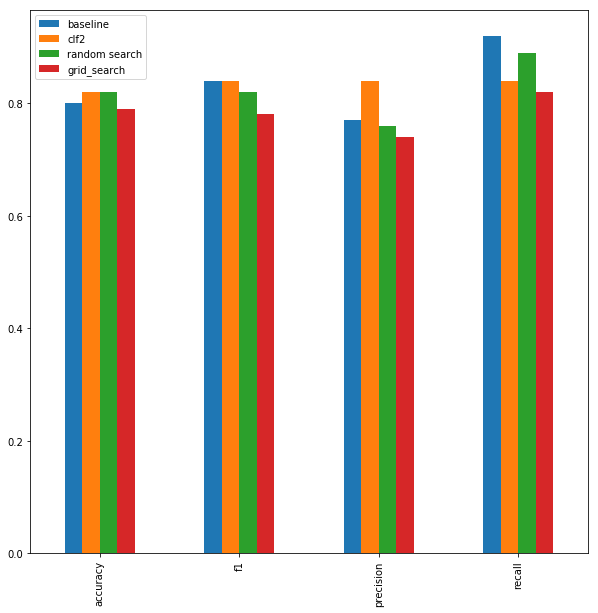

In [48]:
import matplotlib.pyplot as plt
compare_metrics=pd.DataFrame({"baseline":baseline_metrics,
                              "clf2" :clf2_metrics,
                              "random search":rs_metrics,
                              "grid_search":gs_metrics})

compare_metrics.plot.bar(figsize=(10,10));

In [49]:
What_we_are_covering

['0. An end to end scikit learn workflow',
 '1. Getting into data ready',
 '2. choose the right estimator/model/algo for problems',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. save and load a trained model',
 '7. Putting it all together']

# 6.Save and Load a trained model

#### Two ways to save and load machine learning models:

  1.with Python's `pickle` module
 
  2.with the `joblibs` module

**6.1 Pickle**

**save a model**

In [50]:
import pickle


#save an existing model to file

pickle.dump(gs_clf,open("gs_random_forest_model_1.pkl","wb"))

**Load a saved model**

In [53]:
load_pickle_model=pickle.load(open("gs_random_forest_model_1.pkl","rb"))

In [55]:
#Makle some prediction

pickle_y_preds=load_pickle_model.predict(X_test)
evaluate_preds(y_test,pickle_y_preds)

Acc:78.69%
Precision:0.74
Recall:0.82
F1:0.78


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.78}

In [ ]:
Acc:78.69%
Precision:0.74
Recall:0.82
F1:0.78
    
same as original model input

**6.2 joblib**

In [57]:
from joblib import dump,load

#save model to file
dump(gs_clf,filename="gs_random_forest_model_1.joblib")


['gs_random_forest_model_1.joblib']

In [58]:
#import a saved joblib model
load_joblib_model=load(filename="gs_random_forest_model_1.joblib")

In [59]:
#Make and evaluate joblib predictions
joblib_preds=load_joblib_model.predict(X_test)

evaluate_preds(y_test,joblib_preds)
 

Acc:78.69%
Precision:0.74
Recall:0.82
F1:0.78


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.78}

In [ ]:
# According to sckikit learn model if model is large use joblib

In [60]:
What_we_are_covering

['0. An end to end scikit learn workflow',
 '1. Getting into data ready',
 '2. choose the right estimator/model/algo for problems',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. save and load a trained model',
 '7. Putting it all together']

## 7.0 Putting in all together!

https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

In [62]:
data=pd.read_csv("data/car-sales-extended-missing-data.csv")
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
5,Honda,Red,42652.0,4.0,23883.0
6,Toyota,Blue,163453.0,4.0,8473.0
7,Honda,White,NaN,4.0,20306.0
8,NaN,White,130538.0,4.0,9374.0
9,Honda,Blue,51029.0,4.0,26683.0


In [64]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [65]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

# This time we will be doing using scikit pipeline

### Steps we want to do (all in one cell):
**1.Fill missing data**

**2.Convert data to numbers**


**3.Build a model on the data**

In [78]:
#Getting data ready

import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

#Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV

#Setup random seed
import numpy as np
np.random.seed(42)

#Import data and drop rows with missing lables
data=pd.read_csv("data/car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"],inplace=True)

#Define different features and transformer pipeline
categorical_features=["Make", "Colour"]
categorical_transformer = Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="constant",fill_value="missing")),
    ("onehot",OneHotEncoder(handle_unknown="ignore"))                                   
                                       ])
door_features=["Doors"]
door_transformer = Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="constant",fill_value=4))
])

numeric_features = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="mean"))
                                   ])
#Setup the preprocessing steps (fill the missing values, then convert to numbers)
preprocessor=ColumnTransformer(
transformers=[
    ("cat",categorical_transformer,categorical_features),
    ("door",door_transformer,door_features),
    ("num",numeric_transformer,numeric_features)
    
])

#Create a preprocessing and modelling pipeline
model=Pipeline(steps=[("preprocessor",preprocessor),
                     ("model",RandomForestRegressor())
                     ])

#Split the data
X=data.drop("Price",axis=1)
y=data["Price"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)


#Fit and score the model
model.fit(X_train,y_train)
model.score(X_test,y_test)


C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.1821575815702311

It's also possible to use `GridSearchCV` or `RandomizedSearchCV` with our `pipeline`

In [85]:
model.get_params()

{'memory': None,
 'steps': [('preprocessor',
   ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
            transformer_weights=None,
            transformers=[('cat', Pipeline(memory=None,
        steps=[('imputer', SimpleImputer(copy=True, fill_value='missing', missing_values=nan,
          strategy='constant', verbose=0)), ('onehot', OneHotEncoder(categorical_features=None, categories=None,
          dtype=<class 'numpy.float64'>, handle_unknown='i...rue, fill_value=None, missing_values=nan, strategy='mean',
          verbose=0))]), ['Odometer (KM)'])])),
  ('model',
   RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
              max_features='auto', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
              oob_score=False, random_state=None, verbose=0, warm_start=Fal

In [90]:
#Use GridSearchCV with our regression Pipeline

pipe_grid={
    
    "preprocessor__num__imputer__strategy":["mean","median"],
    "model__n_estimators":[100,1000],
    "model__max_depth" :[None,5],
    "model__max_features" :["auto"],
    "model__min_samples_split":[2,4]
    
}

gs_model=GridSearchCV(model,pipe_grid,cv=5,verbose=2)
gs_model.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.2s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.2s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.2s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.2s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, 

[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.2s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.2s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.2s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_feat

[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean, total=   1.7s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median, total=   1.6s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median, total=   1.5s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, model

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  1.7min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('preprocessor', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('cat', Pipeline(memory=None,
     steps=[('imputer', SimpleImputer(copy=True, fill_value='missing', missing_values=nan,
       strategy='constant'...ators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'preprocessor__num__imputer__strategy': ['mean', 'median'], 'model__n_estimators': [100, 1000], 'model__max_depth': [None, 5], 'model__max_features': ['auto'], 'model__min_samples_split': [2, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [92]:
gs_model.score(X_test,y_test)

0.3337859800130589

In [93]:
What_we_are_covering

['0. An end to end scikit learn workflow',
 '1. Getting into data ready',
 '2. choose the right estimator/model/algo for problems',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. save and load a trained model',
 '7. Putting it all together']

# Best Place : Scikitlearn : https://scikit-learn.org/stable/user_guide.html